# Workshop on signal analysis and feature extraction

Course: Intelligent Sensing and Sense Making

Website: https://www.iss.nus.edu.sg/executive-education/course/detail/intelligent-sensing-and-sense--making/artificial-intelligence

Contact: Tian Jing

Email: tianjing@nus.edu.sg

## Objective

In this workshop, we will perform following three tasks.
- Perform wavelet decomposition/reconstruction on signal
- Perform wavelet-based signal denoising
- Extract statistical features from wavelet coefficients from human wearable sensor data, and then perform classification for human activity classification

## Reference

- G. Lee, R. Gommers, F. Wasilewski, K. Wohlfahrt, A. O’Leary, H. Nahrstaedt, “PyWavelets - Wavelet Transforms in Python”, https://github.com/PyWavelets/pywt. The Help document of this tool is provided at https://pywavelets.readthedocs.io/en/latest/

- Evaluate Machine Learning Algorithms for Human Activity Recognition, https://machinelearningmastery.com/evaluate-machine-learning-algorithms-for-human-activity-recognition/

## Submission guideline

Once you finish the workshop, rename your .ipynb file to your name, and submit your .ipynb file into LumiNUS.


In [57]:
# Load necessary packages
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pywt
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [58]:
# Grant access to google drive.
# Run this cell, then you’ll see a link, click on that link, allow access
# Copy the code that pops up, paste it in the box, hit Enter

from google.colab import drive
drive.mount('/content/gdrive')

# Change working directory to be current folder
# os.chdir('/content/gdrive/My Drive/Your Folder Name/Your sub Folder Name')
os.chdir('/content/gdrive/My Drive/iss/issm/signal')
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
data


# Exercise 1: 1D signal wavelet decomposition

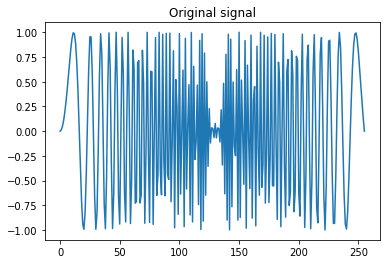

In [59]:
x = np.linspace(0, 1, num=256)
chirp_signal = np.sin(250 * np.pi * x**2)
    
plt.plot(chirp_signal)
plt.title('Original signal')
plt.show()

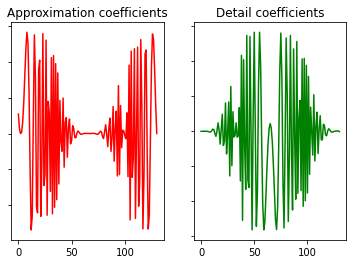

In [60]:
# Example: Perform wavelet decomposition on 1D data

# Step 1: Define input data and type of wavelet

# Data: Input data
data = chirp_signal

# waveletname: Type of wavelet (filter)
waveletname = 'db4'

# Step 2: Perform one-level wavelet decomposition
(data, coeff_d) = pywt.dwt(data, waveletname)

# Step 3: Perform drawing on your wavelet coefficients

fig, axarr = plt.subplots(nrows=1, ncols=2)
axarr[0].plot(data, 'r')
axarr[1].plot(coeff_d, 'g')
axarr[0].set_yticklabels([])
axarr[1].set_yticklabels([])
axarr[0].set_title("Approximation coefficients")
axarr[1].set_title("Detail coefficients")
plt.show()

# Exercise 2: Wavelet-based signal denoising

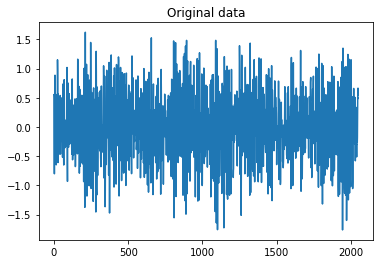

(2048,)


In [61]:
# Load data from Excel
df = pd.read_csv('data/test.csv', header=None)
signal_orig = df[0].values
plt.plot(signal_orig)
plt.title('Original data')
plt.show()
print(signal_orig.shape)

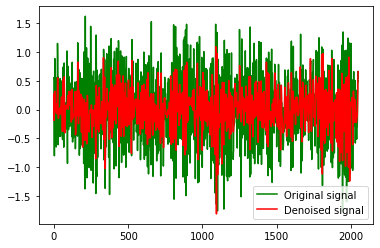

In [62]:
# Step 0: Configuration of wavelet decomposition

waveletname = 'db4' # filter
waveletlevel = 2 # no. of levels

# Step 1: Perform wavelet decomposition

coeffs_orig = pywt.wavedec(signal_orig, waveletname, level=waveletlevel)

coeffs_filter = coeffs_orig.copy()

# Step 2: Perform thresholding on the wavelet coefficients

# Set the threshold
threshold = 0.8

for i in range(1, len(coeffs_orig)):
    coeffs_filter[i] = pywt.threshold(coeffs_orig[i], threshold*max(coeffs_orig[i]))

# Step 3: Perform reconstruction on the filered coefficients

signal_denoised = pywt.waverec(coeffs_filter, waveletname)

# Step 4: Plot and compare the original signal and the denoised signal

plt.figure()
plt.plot(signal_orig, 'g', label='Original signal')
plt.plot(signal_denoised, 'r', label='Denoised signal')
plt.legend()
plt.show()

# Exercise 3: Human activity classification

**Dataset: UCI Human Activity Recognition Using Smartphones**

This dataset contains sensor data for 30 persons, each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, 3-axial linear acceleration and 3-axial angular velocity are recorded at a constant rate of 50Hz.

Website: https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones


In [63]:
# Load training data and label, test data and label

def read_signals(filename):
    with open(filename, 'r') as fp:
        data = fp.read().splitlines()
        data = map(lambda x: x.rstrip().lstrip().split(), data)
        data = [list(map(float, line)) for line in data]
    return data

def read_labels(filename):        
    with open(filename, 'r') as fp:
        activities = fp.read().splitlines()
        activities = list(map(int, activities))
    return activities

def randomize(dataset, labels):
    permutation = np.random.permutation(labels.shape[0])
    shuffled_dataset = dataset[permutation, :, :]
    shuffled_labels = labels[permutation]
    return shuffled_dataset, shuffled_labels

INPUT_FOLDER_TRAIN = 'data/UCI_HAR/train/Inertial Signals/'
INPUT_FOLDER_TEST = 'data/UCI_HAR/test/Inertial Signals/'

INPUT_FILES_TRAIN = ['body_acc_x_train.txt', 'body_acc_y_train.txt', 'body_acc_z_train.txt', 
                     'body_gyro_x_train.txt', 'body_gyro_y_train.txt', 'body_gyro_z_train.txt',
                     'total_acc_x_train.txt', 'total_acc_y_train.txt', 'total_acc_z_train.txt']

INPUT_FILES_TEST = ['body_acc_x_test.txt', 'body_acc_y_test.txt', 'body_acc_z_test.txt', 
                     'body_gyro_x_test.txt', 'body_gyro_y_test.txt', 'body_gyro_z_test.txt',
                     'total_acc_x_test.txt', 'total_acc_y_test.txt', 'total_acc_z_test.txt']

LABELFILE_TRAIN = 'data/UCI_HAR/train/y_train.txt'
LABELFILE_TEST = 'data/UCI_HAR/test/y_test.txt'

train_signals, test_signals = [], []

for input_file in INPUT_FILES_TRAIN:
    signal = read_signals(INPUT_FOLDER_TRAIN + input_file)
    train_signals.append(signal)
train_signals = np.transpose(np.array(train_signals), (1, 2, 0))

for input_file in INPUT_FILES_TEST:
    signal = read_signals(INPUT_FOLDER_TEST + input_file)
    test_signals.append(signal)
test_signals = np.transpose(np.array(test_signals), (1, 2, 0))

train_labels = read_labels(LABELFILE_TRAIN)
test_labels = read_labels(LABELFILE_TEST)

print("The train dataset contains %d records with %d length (# of data points) and %d components (# of sensors)." % (train_signals.shape[0], train_signals.shape[1], train_signals.shape[2]))
print("The test dataset contains %s records with %d length (# of data points) and %d components (# of sensors)." % (test_signals.shape[0], test_signals.shape[1], test_signals.shape[2]))

uci_har_signals_train, uci_har_labels_train = randomize(train_signals, np.array(train_labels))
uci_har_signals_test, uci_har_labels_test = randomize(test_signals, np.array(test_labels))

activity_label = ['WALKING', 'UPSTAIRS', 'DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']


The train dataset contains 7352 records with 128 length (# of data points) and 9 components (# of sensors).
The test dataset contains 2947 records with 128 length (# of data points) and 9 components (# of sensors).


In [64]:
train_signals.shape # For each record, there are 9 signals of length 128

(7352, 128, 9)

In [65]:
# Define the feature extraction method for each subband

def calculate_statistics(list_values):
    mean = np.nanmean(list_values)
    std = np.nanstd(list_values)
    var = np.nanvar(list_values)
    return [mean, std, var]


# Define feature extraction methods
def get_features(list_values):
    statistics = calculate_statistics(list_values)
    return statistics 

def get_uci_har_features(dataset, labels, waveletname, waveletlevel):
    uci_har_features = []

    for signal_no in range(0, dataset.shape[0]):
        
        if ((signal_no % 500) == 0):
            print('get_uci_har_features, loop %d/%d' % (signal_no, len(dataset)))

        features = []

        for signal_comp in range(0, dataset.shape[2]): # 9 components
            signal = dataset[signal_no, :, signal_comp]
            list_coeff = pywt.wavedec(signal, waveletname, level=waveletlevel) # list_coeff is a list of 4 lists = [approximation_coeffs_list (A3), detail_coeffs_list (D3), detail_coeffs_list (D2), detail_coeffs_list (D1)]

            for coeff in list_coeff:
                features += get_features(coeff) # for each list in list_coeff, get [mean, std, var]. So finally,for each component signal, 'features' will 3*4 = 12 stat elements

        # For each record there will be 9 components* 12 stat elements = 108 stat elements (features)
        uci_har_features.append(features)

    X = np.array(uci_har_features)
    Y = np.array(labels)
    return X, Y

In [66]:
# Extract features from first record (just for understanding)
a,b = get_uci_har_features(uci_har_signals_train[[0]], uci_har_labels_train[0], waveletname = 'db4', waveletlevel = 3)
a.shape

get_uci_har_features, loop 0/1


(1, 108)

In [67]:
# Extract features for both train and test signals
waveletname = 'db4'
waveletlevel = 3

print('Generate features for training data')
X_train, Y_train = get_uci_har_features(uci_har_signals_train, uci_har_labels_train, waveletname, waveletlevel)

print('Generate features for training data')
X_test, Y_test = get_uci_har_features(uci_har_signals_test, uci_har_labels_test, waveletname, waveletlevel)

print('X_train shape:', X_train.shape, 'Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape, 'Y_test shape:', Y_test.shape)

Generate features for training data
get_uci_har_features, loop 0/7352
get_uci_har_features, loop 500/7352
get_uci_har_features, loop 1000/7352
get_uci_har_features, loop 1500/7352
get_uci_har_features, loop 2000/7352
get_uci_har_features, loop 2500/7352
get_uci_har_features, loop 3000/7352
get_uci_har_features, loop 3500/7352
get_uci_har_features, loop 4000/7352
get_uci_har_features, loop 4500/7352
get_uci_har_features, loop 5000/7352
get_uci_har_features, loop 5500/7352
get_uci_har_features, loop 6000/7352
get_uci_har_features, loop 6500/7352
get_uci_har_features, loop 7000/7352
Generate features for training data
get_uci_har_features, loop 0/2947
get_uci_har_features, loop 500/2947
get_uci_har_features, loop 1000/2947
get_uci_har_features, loop 1500/2947
get_uci_har_features, loop 2000/2947
get_uci_har_features, loop 2500/2947
X_train shape: (7352, 108) Y_train shape: (7352,)
X_test shape: (2947, 108) Y_test shape: (2947,)


In [68]:
# Perform classification
clf = GaussianNB() 
clf.fit(X_train, Y_train)
test_score = clf.score(X_test, Y_test)

print('Classification accuracy for test data set: %.4f' % test_score)

Y_predict = clf.predict(X_test)
print(pd.DataFrame(confusion_matrix(Y_test, Y_predict), index=activity_label, columns=activity_label))

Classification accuracy for test data set: 0.5443
            WALKING  UPSTAIRS  DOWNSTAIRS  SITTING  STANDING  LAYING
WALKING         245       177          74        0         0       0
UPSTAIRS         17       436          18        0         0       0
DOWNSTAIRS       88        97         235        0         0       0
SITTING           0         5           0      429        42      15
STANDING          0        18           0      370       122      22
LAYING            0         7           0      393         0     137


$\color{red}{\text{Q1. Perform statistical feature extractions from wavelet coefficients, followed by activity classification.}}$


Tasks
- Modify the function *calculate_statistics()* to include new statistics as features.

- Apply your new statistical features to perform human activity classification.

- Display the accuracy performance and confusion matrix of your new approach


In [69]:
# Provide your solution to Q1 here

# Your modified calculate_statistics() function
def calculate_statistics(list_values):
  mean = np.nanmean(list_values)
  median = np.nanmedian(list_values) # ADDED
  std = np.nanstd(list_values)
  var = np.nanvar(list_values)
  return [mean, median, std, var]

# Extract features for both train and test signals
waveletname = 'db4'
waveletlevel = 3

print('Generate features for training data')
X_train, Y_train = get_uci_har_features(uci_har_signals_train, uci_har_labels_train, waveletname, waveletlevel)

print('Generate features for training data')
X_test, Y_test = get_uci_har_features(uci_har_signals_test, uci_har_labels_test, waveletname, waveletlevel)

print('X_train shape:', X_train.shape, 'Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape, 'Y_test shape:', Y_test.shape)

# Perform classification using the default setting of GaussianNB()
clf = GaussianNB() 
clf.fit(X_train, Y_train)
test_score = clf.score(X_test, Y_test)

print('Classification accuracy for test data set: %.4f' % test_score)

Y_predict = clf.predict(X_test)

# Display the classifier performance
print(pd.DataFrame(confusion_matrix(Y_test, Y_predict), index=activity_label, columns=activity_label))

Generate features for training data
get_uci_har_features, loop 0/7352
get_uci_har_features, loop 500/7352
get_uci_har_features, loop 1000/7352
get_uci_har_features, loop 1500/7352
get_uci_har_features, loop 2000/7352
get_uci_har_features, loop 2500/7352
get_uci_har_features, loop 3000/7352
get_uci_har_features, loop 3500/7352
get_uci_har_features, loop 4000/7352
get_uci_har_features, loop 4500/7352
get_uci_har_features, loop 5000/7352
get_uci_har_features, loop 5500/7352
get_uci_har_features, loop 6000/7352
get_uci_har_features, loop 6500/7352
get_uci_har_features, loop 7000/7352
Generate features for training data
get_uci_har_features, loop 0/2947
get_uci_har_features, loop 500/2947
get_uci_har_features, loop 1000/2947
get_uci_har_features, loop 1500/2947
get_uci_har_features, loop 2000/2947
get_uci_har_features, loop 2500/2947
X_train shape: (7352, 144) Y_train shape: (7352,)
X_test shape: (2947, 144) Y_test shape: (2947,)
Classification accuracy for test data set: 0.6899
           

$\color{red}{\text{Q2. Please provide another application example using wavelet-based feature extraction + statistical classification. (no need programming)}}$


In [70]:
# Provide your solution to Q2 here
# English Accent Classification
# Check if a speaker has native American English accent or non-native American English accent based on speech signal


**Once you finish the workshop, rename your .ipynb file to your name, and submit your .ipynb file into LumiNUS.**

Have a nice day!